# Assignment 4
- Full Name:Zafrin Dhali 
- PID: A12122669

In this assignment, we will be exploring some simple machine learning techniques, namely, polynomial (linear, quadratic, ...) regression. In addition, we will look at the effect of under/overfitting and how to mitigate that via cross-validation. 


When you are done, restart your kernel and rerun every cell on the page, and save the notebook as a pdf. Upload that pdf file on TritonEd, under Assignment 4 (like you did for Assignment 3).

In [1]:
% matplotlib inline

# importing libraries and setting configurations
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
SEED = 42

# Linear & Polynomial Regression
For this assignment, we will be using the Boston Housing Dataset, which looks at a variety of factors which may impact housing price. We will focus on a particular factor, a variable called RM.

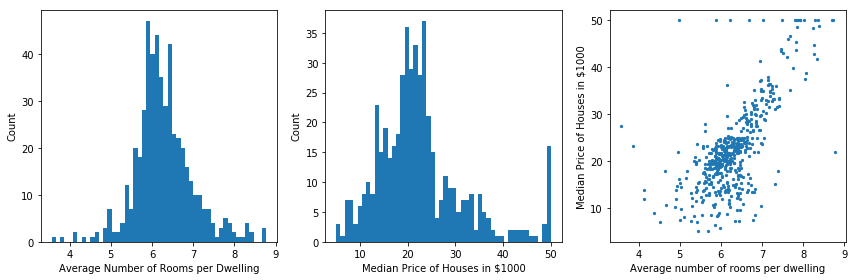

In [2]:
from sklearn import datasets
data = datasets.load_boston()
boston_pd = pd.DataFrame(data['data'],columns=data['feature_names'])
x = boston_pd['RM']
y = data['target']

# plot them
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(x, 50)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(y, 50)
plt.xlabel('Median Price of Houses in $1000')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.scatter(x, y, 5)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median Price of Houses in $1000')
plt.tight_layout()

#plt.plot(x,y, '.')

### Question 1:
(1) Complete the code above to plot the histograms and scatterplots. Fill in your code where it says YOUR_CODE_HERE. (5 line). 

Note that you need to label the axes correctly!
___
(2) Your data will often have ambiguities, and an important skill in data science is to be resourceful in settling these ambiguities. What does the factor RM (variable x) stand for? And what is the unit of housing price in (variable y)?

Don't just guess, find a resource (online or otherwise) that explains the variables, and cite your source. (It's a well-known dataset).

[RM (variable x) is the average number of rooms per house in a neighborhood. The unit of housing price (variable y) is in $1000. 

Source: 
“Title: Boston Housing Data.” Archive.ics.uci.edu, archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names.]
___
(3) Based on visual examination of the housing price histogram and scatter plot (second & third figure), is anything odd about the housing price data points? What may have caused this oddity? 

Hint: we would expect some values to be more common than others, values that are closer to the mean or median of housing price. But some other values would be unusual to be found very common, especially if they are exactly the same.

['There appears to be a large number of houses priced at 50000 dollars which disrupts the normal distribution in the 2nd graph which is just a histogram of price. Furthermore, from the 3rd graph which is a scatterplot we are able to see that the $50000 homes have varying amount of rooms which also disrupts the positive linear relation seen between average number of rooms and median house price. This suggests that there may be data anomalies since there seem to be data points where the house price and number of rooms do not correlate randomly.']
___
(4) In words, describe the relationship between the two variables (as you see in the scatterplot), specifically in terms of housing price and the mysterious variable RM. You will need the answer from part 2 to correctly answer this question.

[There is a positive linear correlation between the number average number of rooms in a neighborhood and the average house price. This is justifiable as a house with more rooms is likely to be a larger house with a higher price. Since RM is the average number of rooms in a neighborhood, it also correlates to the quality of the neighborhood as nicer neighborhoods tend to have larger houses with more rooms and cost more as well. With these considerations, it is justified that there will be positive correlation between median house price (in $1000.) and the average number of rooms per neighborhood.] 

[  9.10210898 -34.67062078]


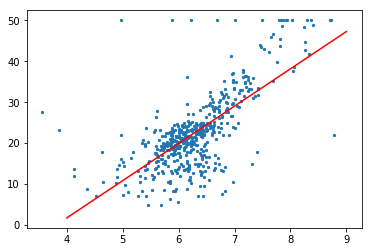

In [3]:
"""
Now, we will perform regression to model the relationship of these two variables, RM and housing price. 
We will use the function numpy.polyfit().
"""

p = np.polyfit(x,y,deg=1)
plt.scatter(x,y,5)
plt.plot(np.array([4,9]), np.array([4, 9])*p[0]+p[1],'r-')

print(p)

Price of a 7 Bedroom house: $ 29044.1420918


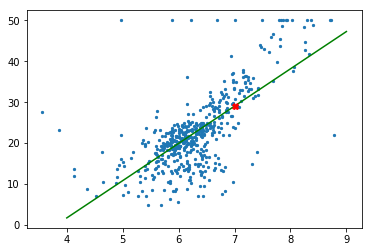

In [9]:
priceofhousewith7rooms=np.array(7*p[0]+p[1])
plt.scatter(x,y,5)
plt.plot(np.array([4,9]), np.array([4, 9])*p[0]+p[1],'g-')
plt.plot(7, 7*p[0]+p[1],'rX')


print 'Price of a 7 Bedroom house: $ %s' %(priceofhousewith7rooms*1000)

### Question 2
(1) Complete the code above to perform the polynomial regression fit (1 line).
___
(2) In np.polyfit(), what does the parameter 'deg' represent?

Look into the documentation of the function, either via Google, or by pressing shift+tab with your cursor inside the brackets of the function then click on the plus sign to expand. 

[In numpy, the degree argument of the polyfit function defines the degree of the polynomial function that should be used to best fit the data provided. In this case, since the relationship is linear (degree of 1) changing the degree produces different lines but doesn't change the type of fit. 

Reference: https://books.google.com/books?id=nUzADAAAQBAJ&pg=PA317&lpg=PA317&dq=numpy+polyfit+degree+argument&source=bl&ots=G-RdYkoAMO&sig=Go1fr61YX3yw9YmYWUgZL0lPaII&hl=en&sa=X&ved=0ahUKEwixq6b-5P3XAhVBRWMKHdcICv4Q6AEITzAG#v=onepage&q=numpy%20polyfit%20degree%20argument&f=false]
___
(3) If you've completed part 1 correctly, you should see a plot and 2 numbers printed: [9.102, -34.671] (I've rounded them to 3 decimal points here). 

What do these two numbers represent in the regression model, in terms of polynomial coefficients? And what do they mean specifically in the context of the housing price data (answer in the form of: for every BLANK, the housing price will BLANK)? 

Hint: the plot should help you.

[For every increase in room number for a house, the house price increases by $9,102 according to the linear model.

Slope= 9.102 
Y int= -34.671]
___
(4) For a house with a RM value of 7, what would be it's predicted price, using the above model you generated?

[$29,044]

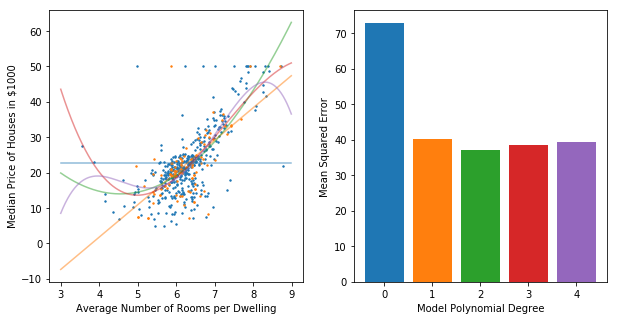

In [10]:
"""
Now, we will perform model selection via cross-validation. To do this, we first need to randomly separate the data 
into a training set and a test (or validation) set. Then, we fit different models to the training set, and evaluate 
the goodness of fit on the test set. The different models we will try are polynomials of increase degrees.
"""

###########################################
# This function makes your life easier
def poly_predict(x,p):
    # takes the polynomial coefficients p and feature vector x, and generate the value y such that
    # y = p[-1]+x*p[-2]+x^2*p[-3]...
    y = np.zeros(np.shape(x))
    for ip in range(len(p)):
        y = y + p[ip]* (x**(len(p)-ip-1))
        
    return y

###########################################
np.random.seed(SEED)

test_inds = np.random.randint(0,len(x),100) # generate 100 indices randomly to be the test set
train_inds = np.setdiff1d(np.arange(len(x)), test_inds) # take the rest to be training set indices

# grabbing the training and testing data
x_train = x[train_inds]
y_train = y[train_inds]
x_test = x[test_inds]
y_test = y[test_inds]
x_plot = np.arange(3,9,0.01)
max_deg = 5
MSEs = np.zeros(max_deg)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_train,y_train,2)
plt.scatter(x_test,y_test,2)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Price of Houses in $1000')
for degree in range(0,max_deg):
    p = np.polyfit(x_train, y_train, deg=degree) # perform the regression on training data
    y_pred = poly_predict(x_test,p) # get the predicted value for test data

    MSEs[degree] = np.mean((y_test-y_pred)**2)
    
    plt.plot(x_plot, poly_predict(x_plot,p), '-', alpha=0.5) # this plots the regression line
    
plt.subplot(1,2,2)

# plot the errors and compare to each other
plt.bar(np.arange(max_deg),MSEs, color= plt.rcParams['axes.prop_cycle'].by_key()['color'][:max_deg])
plt.xlabel('Model Polynomial Degree')
plt.ylabel('Mean Squared Error')

### QUESTION 3:
(1) Complete the above code to 1) fit the model on the training data, 2) compute the mean squared error between the predicted and actual housing price for the test data, and 3) label the axes of scatterplot correctly (4 line).
___
(2) The plot on the left shows the training data (blue dots), test data (orange dots), as well as all the models we've fit to the training data. The plot on the right shows the mean squared error of each model, where the color of the bar corresponds with the color of the line on the left. 

Judging by the quality of the lines in fitting the data, as well as the mean squared error of each model, which polynomial model do you think is the best fit (constant, linear, etc.)?

There is no one right answer here, justify your argument with respect to the fit errors, whether the model is under or overfitting the data, as well as common sense reasoning about the data itself.

[Any polynomial fit with a degree above 0 seems to minimize the MSE drastically which is a measure of the difference between the actual data point and the predicted value for that value. For polynomial fits above zero, the MSE is about the same with small fluctuations. While the 2nd degree polynomial minimizes the MSE the most, suggesting the better fit, it does not reflect the generic nature of the trend, which upon first glance seems linear. While the 1st degree polynomial may have a slightly higher MSE, it captures the generic trend of the data that is seen intuitively. The 2nd degree polynomial is an example of overfitting where more data points are met by the regression but doesn't make logical sense of the data. As there is no reason why a 3 bedroom house and a 6 bedroom house would both be priced at approximately $20,000 which is what the quadratic polynomial fit suggests. As such, the 1st degreee polynomial is a better fit for our data, as it minimizes MSE, captures the data, and intuitively makes sense of the data.]